In [60]:
import uproot3
import awkward0 as awk
import numpy as np
import matplotlib.pyplot as plt
import uproot_methods
import uproot3_methods

In [61]:
import os
import sys

In [62]:
# input_file = uproot3.open("/cms/routray/crab_output/muontuples_10percent_v2/ScoutingCaloMuon/ScoutingCaloMuon_Ntuples_Run2017D_v1/200307_225553/0000/scouting_ntuple_1.root")
#print("kind of objects: ", input_file.classnames())                                                                                                                                 

#ROOT.TFile('/cms/routray/crab_output/muontuples_10percent_v2/ScoutingCaloMuon/ScoutingCaloMuon_Ntuples_Run2017D_v1/200307_225553/0000/scouting_ntuple_{0}.root'.format(sys.argv[1]))

In [63]:
input_file = uproot3.open("/cms/threejet-2/beatrice/muon_ntuples_sl7/CMSSW_10_2_5/src/MuonAnalysis/Scouting/condor/output/2017/D/flattree_1.root")


In [64]:
data_keys = input_file.keys()
print(data_keys)


[b'events;5', b'events;4']


In [65]:
tree = input_file["events"]

vals = tree.keys()
print("Tree keys:")
print(vals)

Tree keys:
[b'run', b'lumi', b'event_num', b'num_muons', b'dimuon_pt', b'dimuon_mass', b'dimuon_dR', b'muon1_trkiso', b'muon2_trkiso', b'muon1_pt', b'muon2_pt', b'muon1_eta', b'muon2_eta', b'muon1_phi', b'muon2_phi', b'muon1_excesspixelhits', b'muon2_excesspixelhits', b'muon1_q', b'muon2_q', b'muon1_chi2overndof', b'muon2_chi2overndof', b'muon1_dxy', b'muon2_dxy', b'muon1_dxycorr', b'muon2_dxycorr', b'num_jets', b'jet_pt', b'jet_eta', b'jet_phi', b'jet_mass', b'jet_csv', b'PVx', b'PVy', b'PVz', b'dRmuon1_closestjet', b'dRmuon2_closestjet']


In [66]:
tree.show()

run                        (no streamer)              asdtype('>i4')
lumi                       (no streamer)              asdtype('>i4')
event_num                  (no streamer)              asdtype('>i4')
num_muons                  (no streamer)              asdtype('>i4')
dimuon_pt                  (no streamer)              asdtype('>f4')
dimuon_mass                (no streamer)              asdtype('>f4')
dimuon_dR                  (no streamer)              asdtype('>f4')
muon1_trkiso               (no streamer)              asdtype('>f4')
muon2_trkiso               (no streamer)              asdtype('>f4')
muon1_pt                   (no streamer)              asdtype('>f4')
muon2_pt                   (no streamer)              asdtype('>f4')
muon1_eta                  (no streamer)              asdtype('>f4')
muon2_eta                  (no streamer)              asdtype('>f4')
muon1_phi                  (no streamer)              asdtype('>f4')
muon2_phi                  (no str

In [67]:
branches = tree.arrays(namedecode='utf-8')
#print(branches['Run'])                                                                                                                                                              
print("First 10 dimuon_pt values:")
for i in range(10):
    print(branches['dimuon_pt'][i])

First 10 dimuon_pt values:
20.082949
15.351138
13.806104
10.060834
6.915235
10.281326
8.663606
11.114048
7.8796453
5.9019985


In [68]:
#convert to table                                                                                                                                                                    
table = awk.Table(branches)
for column_name in table[0]:                                                                                                                                                        
    print(column_name, '=', table[0][column_name])                                                                                                                                  

run = 1217631232
lumi = 1139179520
event_num = -1174405120
num_muons = 2
dimuon_pt = 20.082949
dimuon_mass = 1.3693004
dimuon_dR = 0.13472414
muon1_trkiso = 10.454581
muon2_trkiso = 9.635884
muon1_pt = 10.454581
muon2_pt = 9.635884
muon1_eta = -0.85237616
muon2_eta = -0.9754718
muon1_phi = 0.4716349
muon2_phi = 0.5263894
muon1_excesspixelhits = -1.0
muon2_excesspixelhits = 0.0
muon1_q = -1.0
muon2_q = 1.0
muon1_chi2overndof = 0.39492097
muon2_chi2overndof = 0.7395577
muon1_dxy = -0.0568195
muon2_dxy = -0.07153648
muon1_dxycorr = 0.0076186466
muon2_dxycorr = 0.0012415313
num_jets = 4
jet_pt = [42.177284  0.        0.        0.      ]
jet_eta = [-9.211465e-01  0.000000e+00  5.840251e-35  0.000000e+00]
jet_phi = [5.1036906e-01 0.0000000e+00 5.6481861e-35 0.0000000e+00]
jet_mass = [ 6.2894230e+00  0.0000000e+00 -3.6370635e-01  1.5419888e-41]
jet_csv = [0.000000e+00 0.000000e+00 6.774446e-38 0.000000e+00]
PVx = 0.08455052
PVy = -0.032079823
PVz = -2.232635
dRmuon1_closestjet = 0.078928426
d

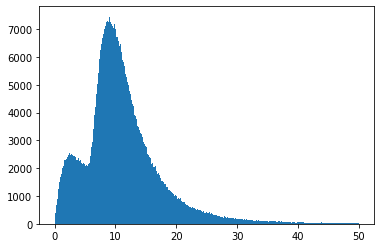

In [69]:
#plot histograms                                                                                                                                                                     
plt.hist(branches['dimuon_pt'].flatten(), bins=1000, range=(0,50))
plt.show()

In [70]:
###make Lorentz vectors                                                                                                                                                              

#select only events with 2 muons, put them in a table, make lorentz vector                                                                                                           
two_muon_events = (branches['num_muons'] == 2)
#two_muons_table = awk.Table(two_muon_events)                                                                                                                                        
two_muons_table = table[two_muon_events]
print("two muuons table")
print(two_muons_table)
#print(two_muons_table.info())                                                                                                                                                       
print("# of rows, cols", len(two_muons_table), len(two_muons_table.columns))
print("# of rows and cols", two_muons_table.shape)
print("# of elements", two_muons_table.size)
#print(two_muons_table['muon_pt'].size))                                                                                                                                             
#print(two_muons_table['muon_eta'].size))                                                                                                                                            
#print(two_muons_table['muon_phi'].size))                                                                                                                                            


two muuons table
[<Row 0> <Row 1> <Row 2> ... <Row 1490361> <Row 1490362> <Row 1490364>]
# of rows, cols 1423931 36
# of rows and cols (1423931,)
# of elements 1423931


In [71]:
#get invariant mass and deltaR
mu1p = uproot3_methods.TLorentzVectorArray.from_ptetaphim(two_muons_table['muon1_pt'], two_muons_table['muon1_eta'], two_muons_table['muon1_phi'], 0.1056583745)
mu2p = uproot3_methods.TLorentzVectorArray.from_ptetaphim(two_muons_table['muon2_pt'], two_muons_table['muon2_eta'], two_muons_table['muon2_phi'], 0.1056583745)
parentp = mu1p + mu2p

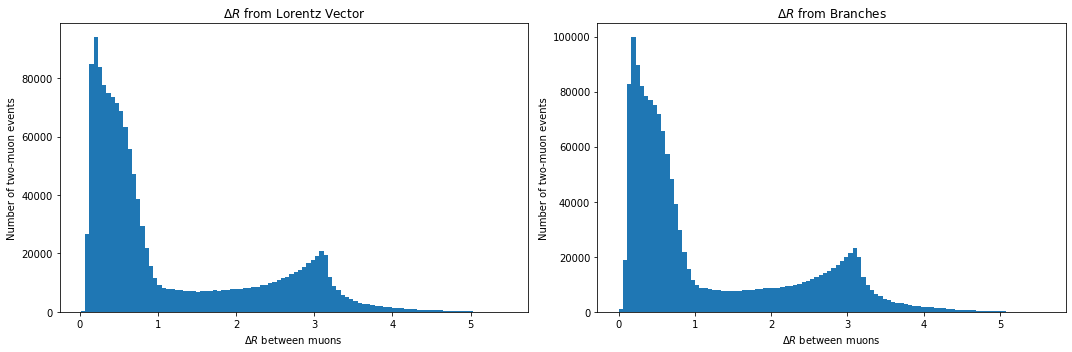

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

deltaR = mu1p.delta_r(mu2p)
axes[0].hist(deltaR, bins=100)
axes[0].set_title('$\Delta R$ from Lorentz Vector')
axes[0].set_xlabel('$\Delta R$ between muons')
axes[0].set_ylabel('Number of two-muon events')

axes[1].hist(branches['dimuon_dR'].flatten(), bins=100)
axes[1].set_title('$\Delta R$ from Branches')
axes[1].set_xlabel('$\Delta R$ between muons')
axes[1].set_ylabel('Number of two-muon events')

fig.tight_layout()

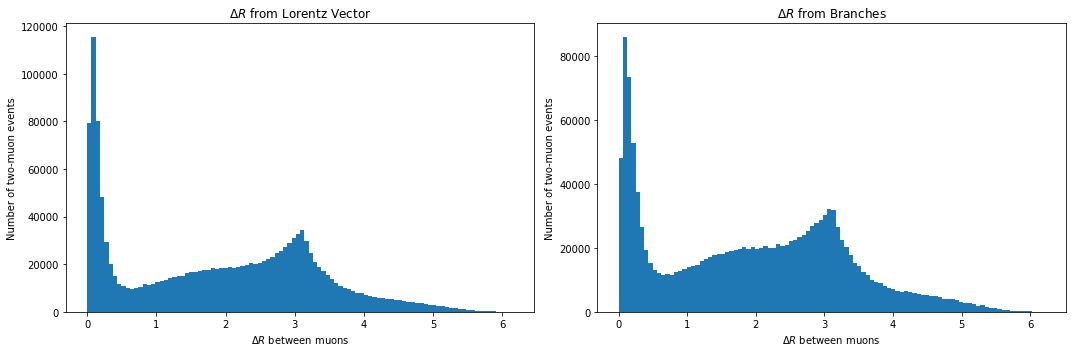

In [73]:
#muon 2 delta R
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(branches['dRmuon1_closestjet'].flatten(), bins=100)
axes[0].set_title('$\Delta R$ from Lorentz Vector')
axes[0].set_xlabel('$\Delta R$ between muons')
axes[0].set_ylabel('Number of two-muon events')

axes[1].hist(branches['dRmuon2_closestjet'].flatten(), bins=100)
axes[1].set_title('$\Delta R$ from Branches')
axes[1].set_xlabel('$\Delta R$ between muons')
axes[1].set_ylabel('Number of two-muon events')

fig.tight_layout()

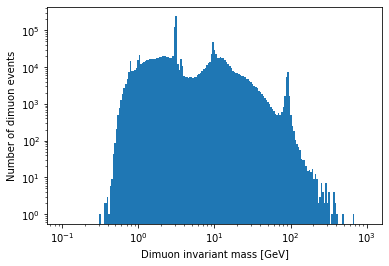

In [74]:
#cut to only include opposite sign muons, apply cut to dimuon 4-vectors                                                                                                              
OS_muons = two_muons_table['muon1_q'] != two_muons_table['muon2_q']
dimuon_p4 = parentp[OS_muons]
plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Make Mass Plots

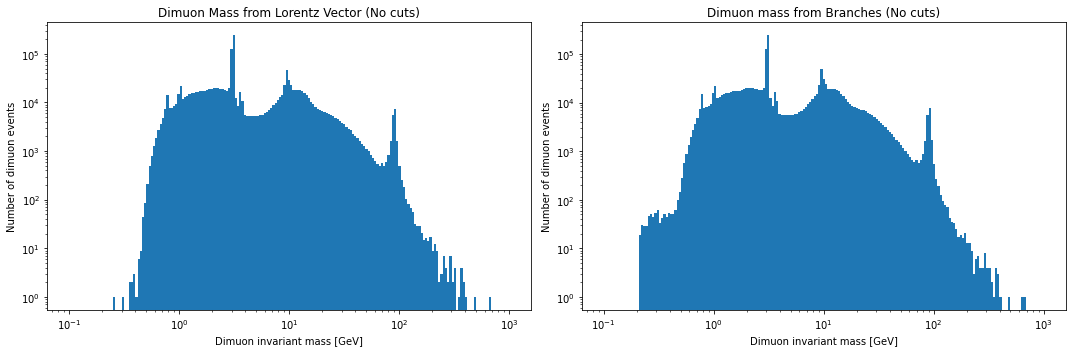

In [75]:
#No cuts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(parentp.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
axes[0].set_title('Dimuon Mass from Lorentz Vector (No cuts)')
axes[0].set_xlabel('Dimuon invariant mass [GeV]')
axes[0].set_ylabel('Number of dimuon events')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# axes[1].hist(branches['dimuon_mass'].flatten(), bins=100, range=(0,5))
axes[1].hist(branches['dimuon_mass'].flatten(), bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
axes[1].set_title('Dimuon mass from Branches (No cuts)')
axes[1].set_xlabel('Dimuon invariant mass [GeV]')
axes[1].set_ylabel('Number of dimuon events')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

fig.tight_layout()

1423931
1423931
1423931
1423931
1423931


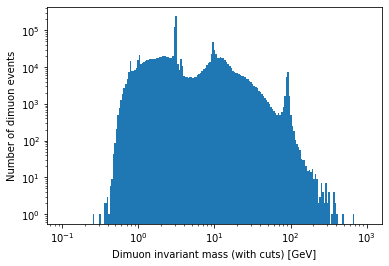

In [76]:
#Add pt, eta, iso cuts
#these cuts return true/false - true means keep that event, false means don't use it
muon1_pt_cut = two_muons_table['muon1_pt'] >= 3
muon2_pt_cut = two_muons_table['muon2_pt'] >= 3
muon1_eta_cut = two_muons_table['muon1_eta'] <= 2.4
muon2_eta_cut = two_muons_table['muon2_eta'] <= 2.4
muon1_iso_cut = two_muons_table['muon1_trkiso'] >= 0.15
muon2_iso_cut = two_muons_table['muon2_trkiso'] >= 0.15
dimuon_all_cuts = muon1_pt_cut & muon2_pt_cut & muon1_eta_cut & muon2_eta_cut & muon1_iso_cut & muon2_iso_cut
# dimuon_all_cuts_or = muon1_pt_cut | muon2_pt_cut | muon1_eta_cut | muon2_eta_cut | muon1_iso_cut | muon2_iso_cut
dimuon_p4_w_cuts = parentp[dimuon_all_cuts]

print(muon1_pt_cut.sum())
print(muon2_pt_cut.sum())
print(muon1_eta_cut.sum())
print(muon2_eta_cut.sum())
print(dimuon_all_cuts.sum())
# print(dimuon_all_cuts_or.sum())

plt.hist(dimuon_p4_w_cuts.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass (with cuts) [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [77]:
print(len(dimuon_p4_w_cuts))
print(len(parentp))
print(dimuon_p4_w_cuts)
print(parentp)

1423931
1423931
[TLorentzVector(x=17.645, y=9.5912, z=-20.993, t=29.084) TLorentzVector(x=2.9569, y=15.064, z=-15.845, t=22.083) TLorentzVector(x=9.017, y=10.455, z=-9.8693, t=17.046) ... TLorentzVector(x=-3.6514, y=-7.9943, z=8.1011, t=26.396) TLorentzVector(x=-5.9288, y=7.161, z=-12.341, t=15.754) TLorentzVector(x=3.6024, y=-7.4976, z=10.467, t=13.722)]
[TLorentzVector(x=17.645, y=9.5912, z=-20.993, t=29.084) TLorentzVector(x=2.9569, y=15.064, z=-15.845, t=22.083) TLorentzVector(x=9.017, y=10.455, z=-9.8693, t=17.046) ... TLorentzVector(x=-3.6514, y=-7.9943, z=8.1011, t=26.396) TLorentzVector(x=-5.9288, y=7.161, z=-12.341, t=15.754) TLorentzVector(x=3.6024, y=-7.4976, z=10.467, t=13.722)]


# Other Variable Plots

### No Cuts

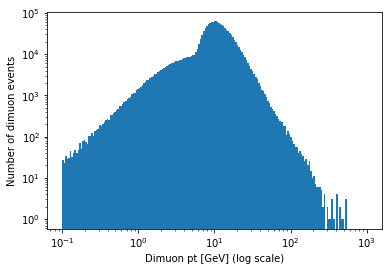

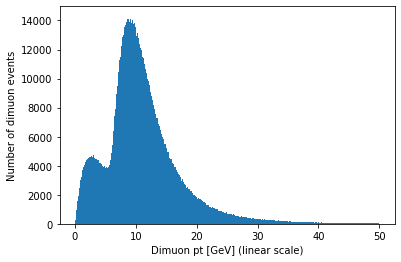

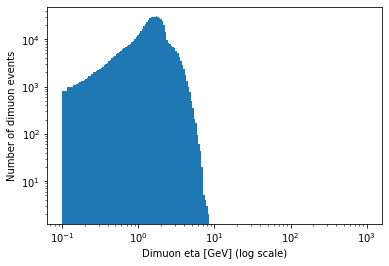

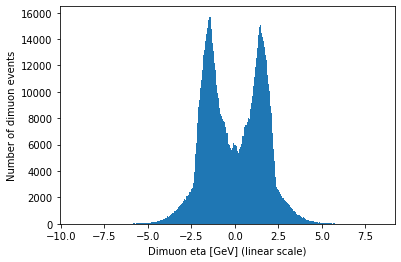

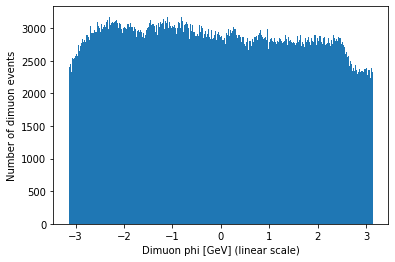

In [78]:
#No cuts
plt.hist(parentp.pt, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon pt [GeV] (log scale)')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.hist(parentp.pt, bins=500, range=(0,50))
plt.xlabel('Dimuon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

plt.hist(parentp.eta, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon eta [GeV] (log scale)')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.hist(parentp.eta, bins=500)
plt.xlabel('Dimuon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

plt.hist(parentp.phi, bins=500)
plt.xlabel('Dimuon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

### Add cuts

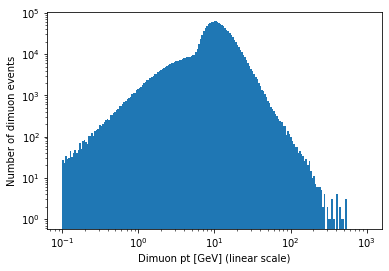

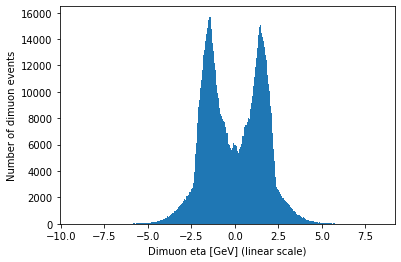

In [79]:
#Add pt, eta, iso cuts
plt.hist(dimuon_p4_w_cuts.pt, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.hist(dimuon_p4_w_cuts.eta, bins=500)
plt.xlabel('Dimuon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()